In [1]:
import csv
import operator
import networkx as nx

In [2]:
artists_csvfile = open('artists-header.csv', 'rt', newline='')
artists_reader = csv.DictReader(artists_csvfile)
fieldnames = artists_reader.fieldnames
artists_csvfile.close()
artists_csvfile = open('artists.csv', 'rt', newline='')
artists_reader = csv.DictReader(artists_csvfile, fieldnames=fieldnames)

releases_csvfile = open('releases-header.csv', 'rt', newline='')
releases_reader = csv.DictReader(releases_csvfile)
fieldnames = releases_reader.fieldnames
releases_csvfile.close()
releases_csvfile = open('releases.csv', 'rt', newline='')
releases_reader = csv.DictReader(releases_csvfile, fieldnames=fieldnames)

relationships_csvfile = open('relationships-header.csv', 'rt', newline='')
relationships_reader = csv.DictReader(relationships_csvfile)
fieldnames = relationships_reader.fieldnames
relationships_csvfile.close()
relationships_csvfile = open('relationships.csv', 'rt', newline='')
relationships_reader = csv.DictReader(relationships_csvfile, fieldnames=fieldnames)

In [3]:
G = nx.Graph()
G.add_nodes_from([(artist['id:ID'], {'name': artist['name'], 'url': artist['url']})
                 for artist in artists_reader])
G.add_nodes_from([(release['id:ID'], {'name': release['name'], 'url': release['url']})
                 for release in releases_reader])
G.add_edges_from([(edge[':START_ID'], edge[':END_ID'])
                 for edge in relationships_reader])

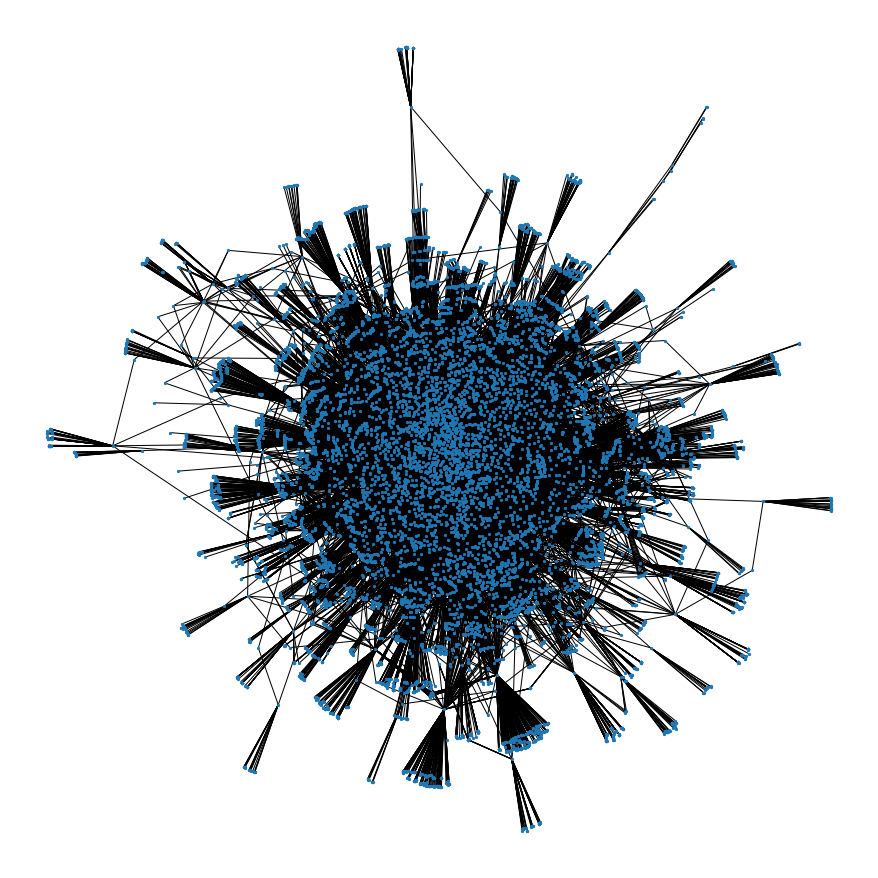

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_spring(G, node_size=5)
plt.show()

In [5]:
#pr = nx.pagerank(G)
pr = nx.pagerank(G, personalization={"artist/2890828": 1})
pr = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)

In [6]:
for item, score in pr[:100]:
    print(f'{score:.4f} {G.nodes[item]["name"]} {G.nodes[item]["url"]}')

0.1713 Klangkarussell https://www.discogs.com/artist/2890828-Klangkarussell
0.0100 BRIT Awards 2014 https://www.discogs.com/Various-BRIT-Awards-2014/release/13173473
0.0096 About:Berlin Vol:21 https://www.discogs.com/Various-AboutBerlin-Vol21/release/13581928
0.0094 Bravo Hits 86 https://www.discogs.com/Various-Bravo-Hits-86/release/6647922
0.0094 Chilled House Classics https://www.discogs.com/Various-Chilled-House-Classics/release/4820566
0.0090 Echo - Deutscher Musikpreis 2015 https://www.discogs.com/Various-Echo-Deutscher-Musikpreis-2015/release/8783795
0.0090 Megahits 2014 Die Erste https://www.discogs.com/Various-Megahits-2014-Die-Erste/release/5850498
0.0089 RMF Hot New Vol. 6 https://www.discogs.com/Various-RMF-Hot-New-Vol-6/release/8335865
0.0087 Latino Summer: The Ultimate Latin Collection https://www.discogs.com/Various-Latino-Summer-The-Ultimate-Latin-Collection/release/12116315
0.0086 Best Of 2012 (Die Hits Des Jahres) https://www.discogs.com/Various-Best-Of-2012-Die-Hits-D

In [8]:
artists_csvfile.close()
releases_csvfile.close()
relationships_csvfile.close()